### Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

#### Reading Dataset

In [2]:
df = pd.read_csv(r'Leads (1).csv')

In [3]:
df.shape

(9240, 37)

In [4]:
pd.set_option('display.max_columns',None)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# dropping unecessary columns
print('Features dropped based on number of unique values : ')
for feature in df.columns:
    if df[feature].nunique() == len(df[feature]):
        print(feature)
        df.drop(feature,axis=True,inplace=True)

Features dropped based on number of unique values : 
Prospect ID
Lead Number


#### Checking for null values

In [6]:
df.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [7]:
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [8]:
df['Lead Quality'].value_counts()[1] / sum(df['Lead Quality'].value_counts()) *100

24.413145539906104

Since there are more than 50% nan values in lead quality and 24% people are not sure of the quality of website so will drop the column

In [9]:
null_cols=[]
for i in df.columns:
    if df[i].isnull().mean()*100 > 50:
        df.drop(i,inplace=True,axis=1)
    elif df[i].isnull().mean()*100 > 0:
        null_cols.append(i)
    else:
        pass

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
blog                    1
WeLearn                 1
NC_EDM                  1
youtubechannel          1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64


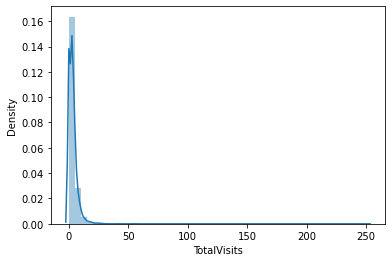

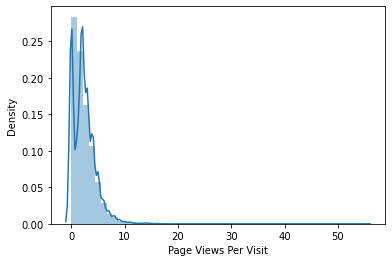

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France            

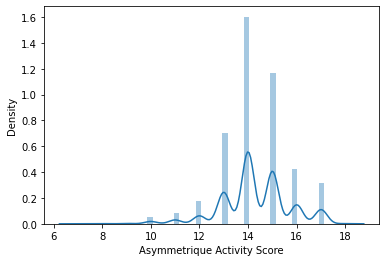

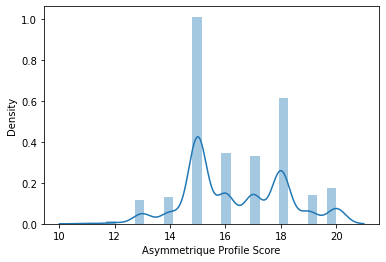

In [10]:
for feature in null_cols:
    if df[feature].dtype == 'O':
        print(df[feature].value_counts())
        print('=====================================')
    else:
        #plt.xlim(50)
        sns.distplot(df[feature])
        plt.show()
        print('=====================================')

#### Null values imputation

In [11]:
for feature in null_cols:
    if df[feature].dtype == 'O':
        df[feature].fillna(df[feature].mode()[0],inplace=True)
    else:
        df[feature].fillna(df[feature].mean(),inplace=True)

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
blog                    1
WeLearn                 1
NC_EDM                  1
youtubechannel          1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64


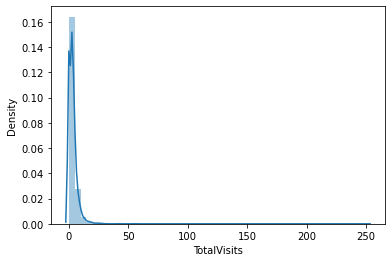

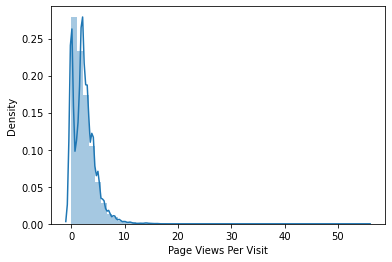

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France            

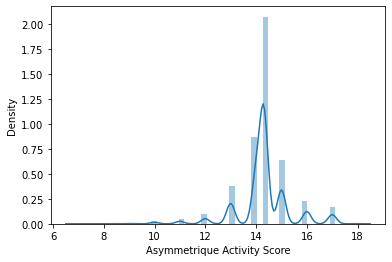

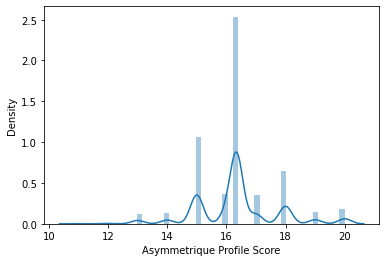

In [12]:
for feature in null_cols:
    if df[feature].dtype == 'O':
        print(df[feature].value_counts())
        print('=====================================')
    else:
        #plt.xlim(50)
        sns.distplot(df[feature])
        plt.show()
        print('=====================================')

In [14]:
num_cols = [i for i in df.columns if df[i].dtype!='O']
cat_cols = [i for i in df.columns if df[i].dtype=='O']
print(df[num_cols].shape)
print(df[cat_cols].shape)

(9240, 6)
(9240, 28)


### Univariate analysis

====== Converted ========
count    9240.000000
mean        0.385390
std         0.486714
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64
mode :   0


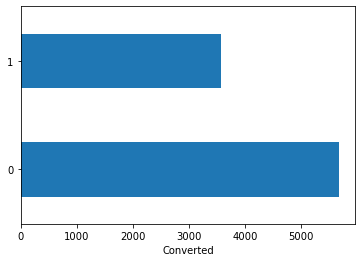

====== TotalVisits ========
count    9240.000000
mean        3.445238
std         4.818723
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64
mode :   0.0


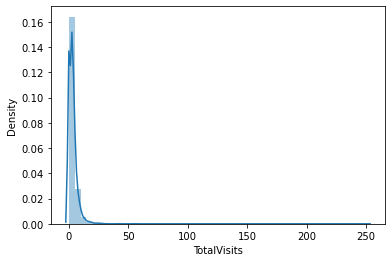

====== Total Time Spent on Website ========
count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64
mode :   0


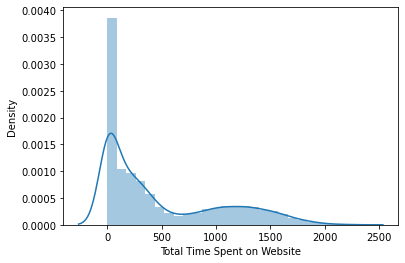

====== Page Views Per Visit ========
count    9240.000000
mean        2.362820
std         2.145333
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64
mode :   0.0


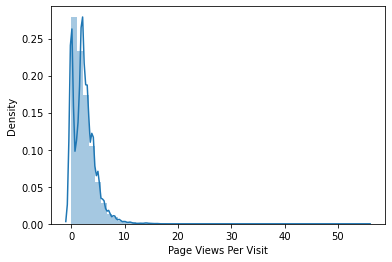

====== Asymmetrique Activity Score ========
count    9240.000000
mean       14.306252
std         1.022265
min         7.000000
25%        14.000000
50%        14.306252
75%        14.306252
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64
mode :   14.306252489048187


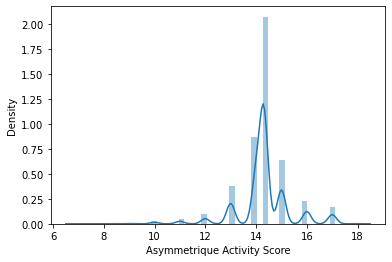

====== Asymmetrique Profile Score ========
count    9240.000000
mean       16.344883
std         1.335352
min        11.000000
25%        16.000000
50%        16.344883
75%        16.344883
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64
mode :   16.344882516925527


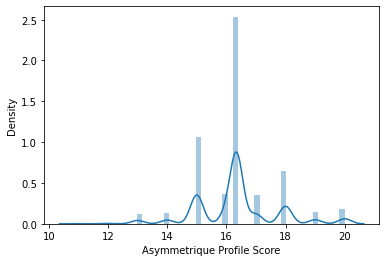

In [15]:
for i in num_cols:
    print('======',i,'========')
    print(df[i].describe())
    print('mode :  ',df[i].mode()[0])
    if df[i].nunique() > 5:
        sns.distplot(df[i])
        plt.xlabel(i)
        plt.show()
    else:
        df[i].value_counts().plot(kind='barh')
        plt.xlabel(i)
        plt.show()
    print('==================================')

========== Lead Origin ==========
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


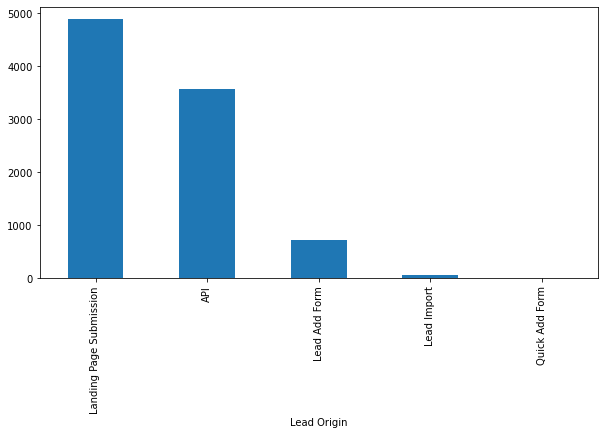

========== Lead Source ==========
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
blog                    1
WeLearn                 1
NC_EDM                  1
youtubechannel          1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64


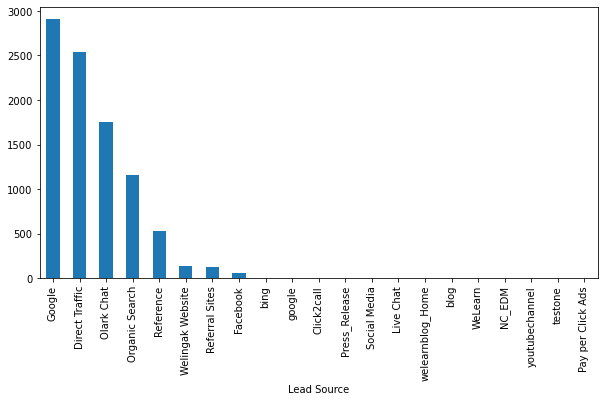

========== Do Not Email ==========
No     8506
Yes     734
Name: Do Not Email, dtype: int64


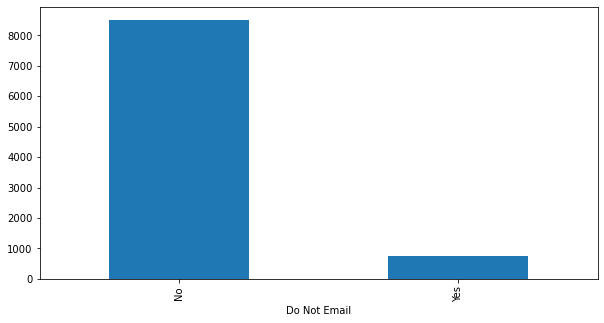

========== Do Not Call ==========
No     9238
Yes       2
Name: Do Not Call, dtype: int64


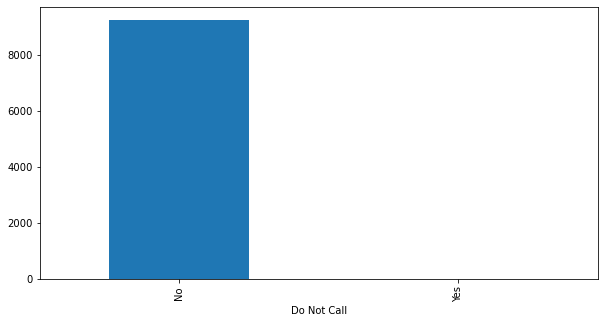

========== Last Activity ==========
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64


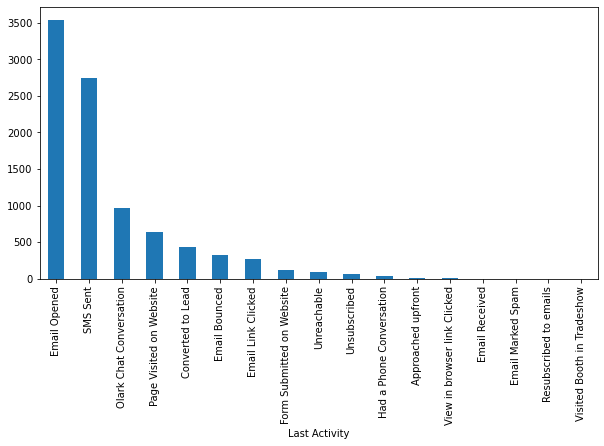

========== Country ==========
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Germany                    4
Canada                     4
Nigeria                    4
Sweden                     3
Philippines                2
Belgium                    2
Ghana                      2
Italy                      2
Netherlands                2
Asia/Pacific Region        2
Bangladesh                 2
China                      2
Uganda                     2
Vietnam                    1
Switzerland                1
Russia                     1
Denmark                    1
Liberia                    1
Sri Lanka    

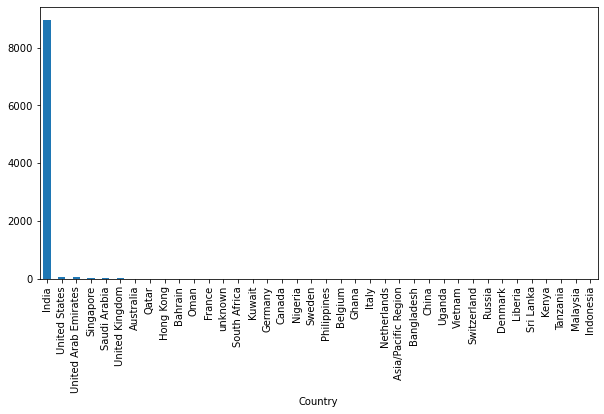

========== Specialization ==========
Select                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


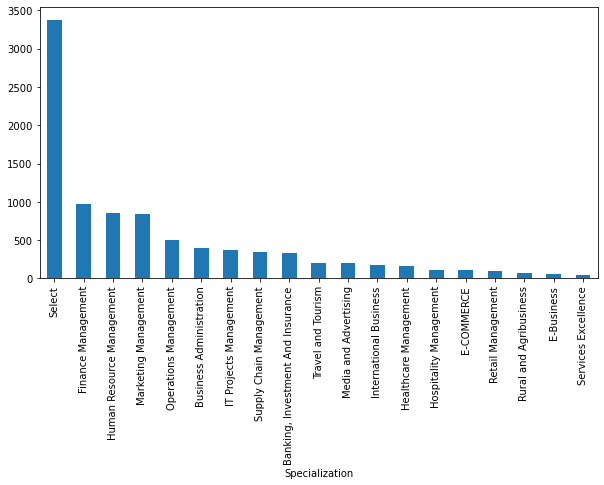

========== How did you hear about X Education ==========
Select                   7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


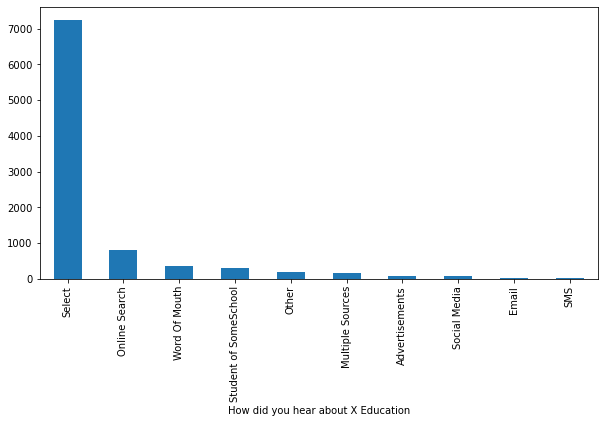

========== What is your current occupation ==========
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


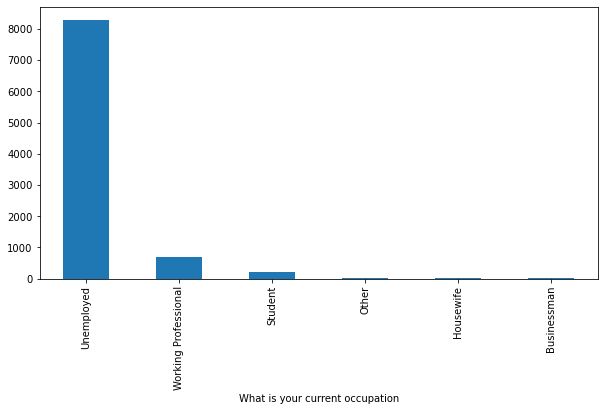

========== What matters most to you in choosing a course ==========
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


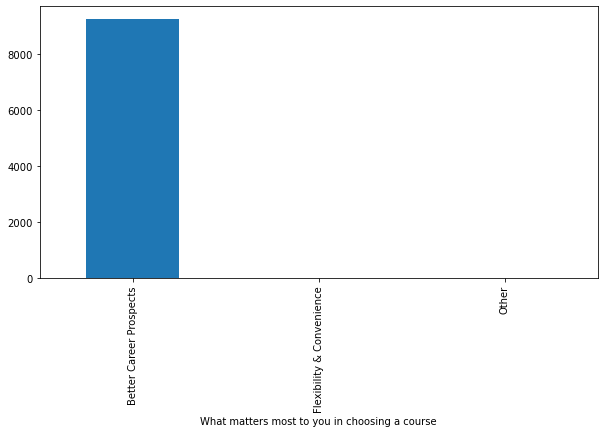

========== Search ==========
No     9226
Yes      14
Name: Search, dtype: int64


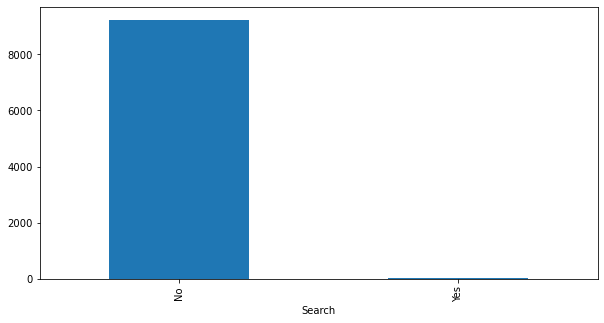

========== Magazine ==========
No    9240
Name: Magazine, dtype: int64


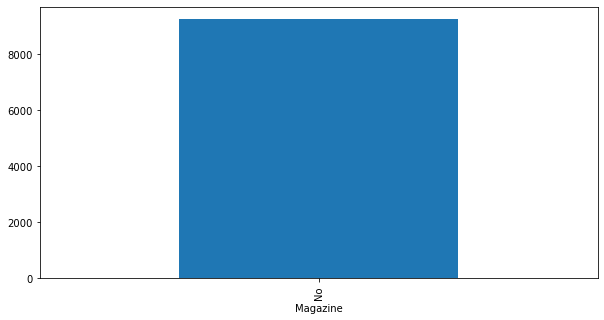

========== Newspaper Article ==========
No     9238
Yes       2
Name: Newspaper Article, dtype: int64


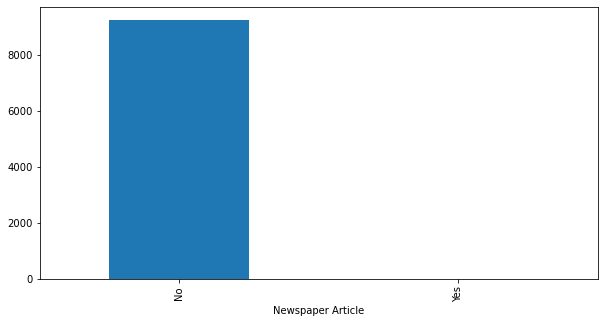

========== X Education Forums ==========
No     9239
Yes       1
Name: X Education Forums, dtype: int64


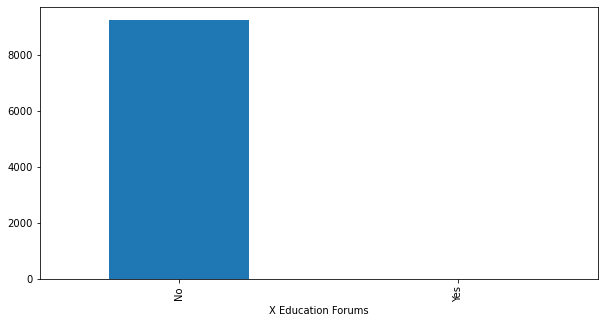

========== Newspaper ==========
No     9239
Yes       1
Name: Newspaper, dtype: int64


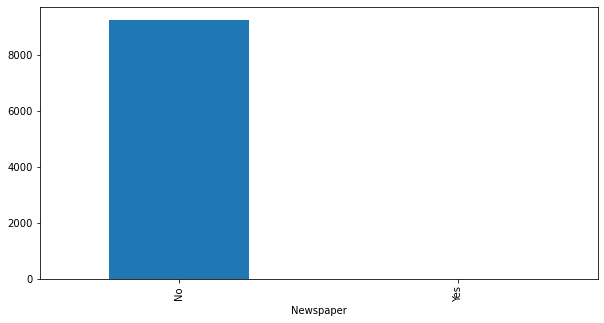

========== Digital Advertisement ==========
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


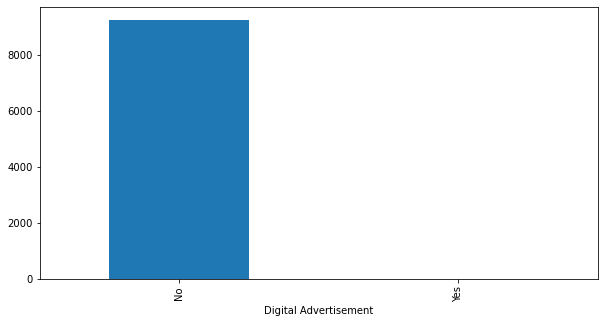

========== Through Recommendations ==========
No     9233
Yes       7
Name: Through Recommendations, dtype: int64


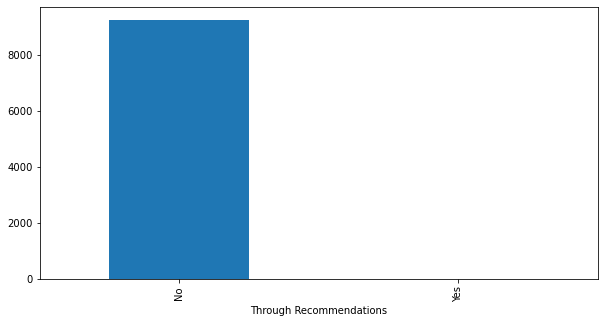

========== Receive More Updates About Our Courses ==========
No    9240
Name: Receive More Updates About Our Courses, dtype: int64


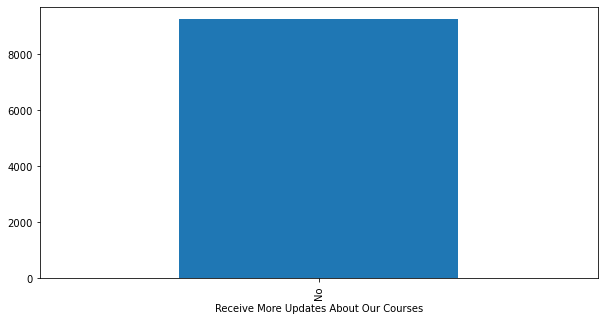

========== Tags ==========
Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                           

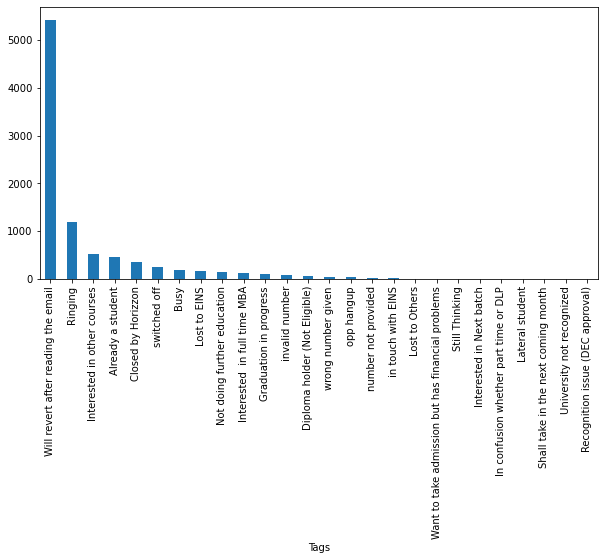

========== Update me on Supply Chain Content ==========
No    9240
Name: Update me on Supply Chain Content, dtype: int64


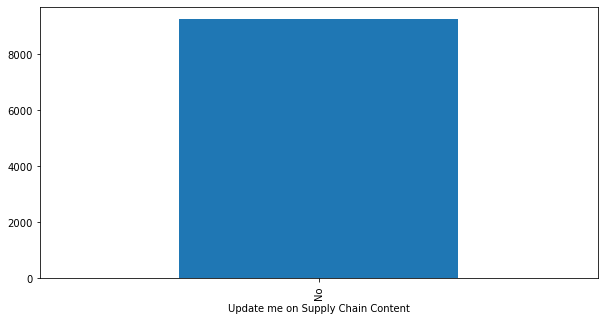

========== Get updates on DM Content ==========
No    9240
Name: Get updates on DM Content, dtype: int64


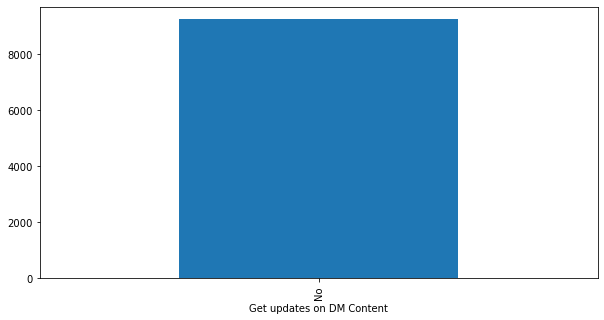

========== Lead Profile ==========
Select                         6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64


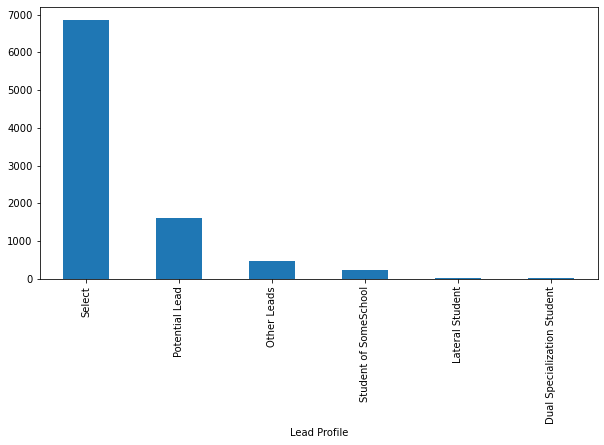

========== City ==========
Mumbai                         4642
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


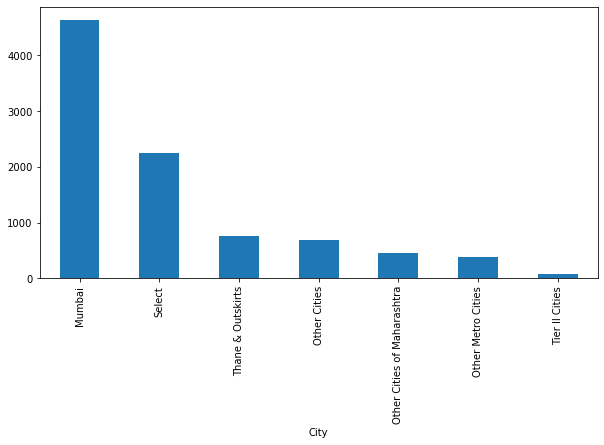

========== Asymmetrique Activity Index ==========
02.Medium    8057
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64


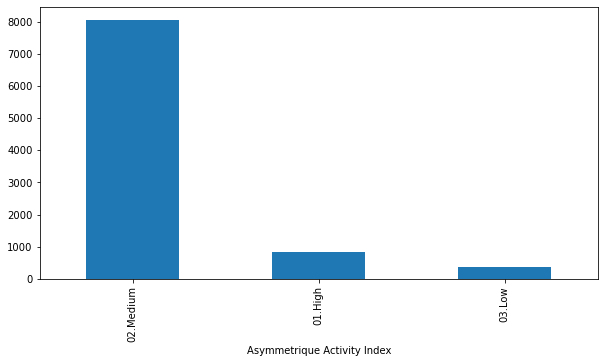

========== Asymmetrique Profile Index ==========
02.Medium    7006
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64


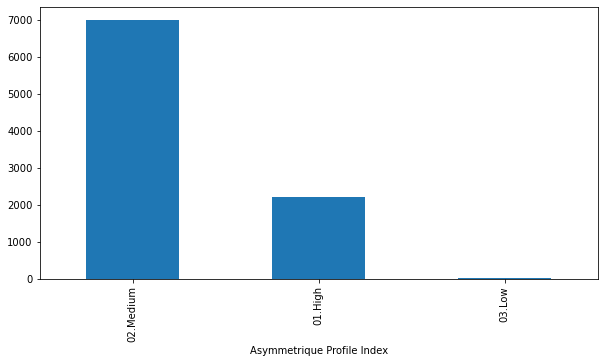

========== I agree to pay the amount through cheque ==========
No    9240
Name: I agree to pay the amount through cheque, dtype: int64


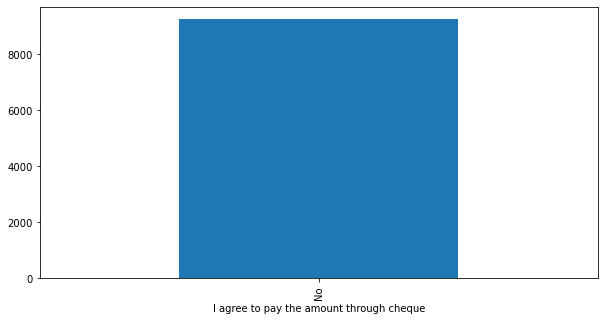

========== A free copy of Mastering The Interview ==========
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


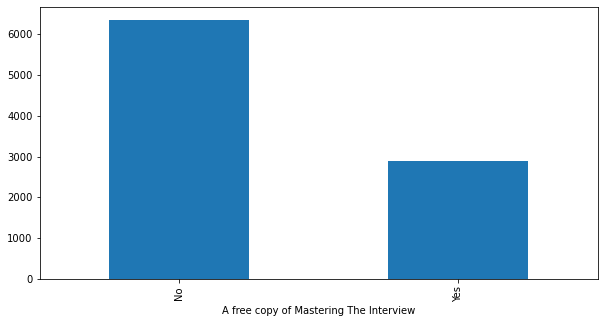

========== Last Notable Activity ==========
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
Email Received                     1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64


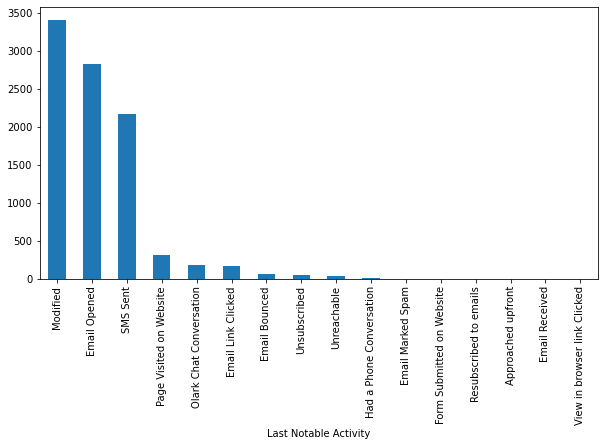

In [21]:
for i in cat_cols:
    print('==========',i,'==========')
    print(df[i].value_counts())
    plt.figure(figsize=(10,5))
    df[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.show()

In [28]:
encode = LabelEncoder()
for i in ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']:
    df[i] = encode.fit_transform(df[i])
df['course_popularity'] = df['Search']+df['Newspaper Article']+df['X Education Forums']+df['Newspaper']+df['Digital Advertisement']+df['Through Recommendations']
df['course_popularity'].value_counts()

0    9217
1      20
2       2
5       1
Name: course_popularity, dtype: int64

In [29]:
# the coloumn in biased 
df.drop(['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],inplace=True,axis=1)


### Bivariate analysis

In [31]:
df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,course_popularity
Converted,1.000000,0.030091,0.362483,-0.003294,0.123491,0.160700,0.002421
TotalVisits,0.030091,1.000000,0.218409,0.512125,-0.037057,0.082152,0.057906
Total Time Spent on Website,0.362483,0.218409,1.000000,0.316262,-0.048259,0.129793,0.023536
Page Views Per Visit,-0.003294,0.512125,0.316262,1.000000,-0.122348,0.119837,0.035587
Asymmetrique Activity Score,0.123491,-0.037057,-0.048259,-0.122348,1.000000,-0.123250,0.001425
Asymmetrique Profile Score,0.160700,0.082152,0.129793,0.119837,-0.123250,1.000000,0.005909
course_popularity,0.002421,0.057906,0.023536,0.035587,0.001425,0.005909,1.000000
